# IT Helpdesk Operations – Exploratory Data Analysis (EDA)
### Beacon Mobility – Leena AI Ticketing System

This notebook analyzes Helpdesk ticket data to identify common issues, operational bottlenecks, SLA performance, and trends by Region and Location.  
The goal is to support IT operations, staffing decisions, and process improvement initiatives.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load the Dataset

In [46]:
df = pd.read_excel(r"C:/Users/brand/OneDrive/IT-Helpdesk-Data/Raw_Data_Leena_AI_Jan_Dec_2025_FINAL_ENRICHED.xlsx")  # update path
df.head()

,Ticket Id,Priority,Category,Sub Category,Description,Last Comment,Status,Created On,Closing Date,Region,...,Prioritization: Discretionary Score,Prioritization: Weighted Score,Prioritization: Total Score,Prioritization: Rank,Month,Week Start,Year,__QC_TextBlob,__QC_IssueType_Auto,__QC_SubIssue_Auto
0,IT00000035273,medium,Beacon Buddy,NaN,Hi All –_x000D_\n_x000D_\nJust following up on...,Per Ryan Rounkles. He asked to close the ticket.,Resolved,2025-12-08 16:28:00,2026-01-27 15:52:00,Central,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hi all – x000d x000d just following up on this...,Access & Account Management,NaN
1,IT00000035981,medium,Beacon Connect,Not receiving notification / emails,CAUTION: This email originated from outside th...,"Hello Sabrina, \nWe will be closing this ticke...",Resolved,2025-12-18 08:45:00,2026-01-26 15:38:00,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,caution: this email originated from outside th...,NaN,NaN
2,IT00000035943,medium,Beacon Connect,Data Entry,"Hello,_x000D_\n_x000D_\nPlease add calendar ev...","Hi,\nThe caelndar info have been uploaded to t...",Resolved,2025-12-17 14:35:00,2026-01-22 10:56:00,Central,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"hello, x000d x000d please add calendar events ...",Data Integrity,Roster / Manifest
3,IT00000035738,medium,Beacon Connect,Not receiving notification / emails,CAUTION: This email originated from outside th...,"Good day, Mallory,\nI hope you are doing well....",Resolved,2025-12-15 15:47:00,2026-01-20 15:25:00,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,caution: this email originated from outside th...,Data Integrity,Roster / Manifest
4,IT00000035941,medium,Beacon Connect,Data Entry,"Hello,_x000D_\n_x000D_\nPlease add calendar ev...",All of the calendar events have been created,Resolved,2025-12-17 14:31:00,2026-01-19 14:38:00,Central,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"hello, x000d x000d please add calendar events ...",Data Integrity,Roster / Manifest


## 2. Initial Data Inspection

This section explores the structure, data types, missing values, and basic statistics of the dataset.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2487 entries, 0 to 2486
Data columns (total 83 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Ticket Id                               2487 non-null   object        
 1   Priority                                2487 non-null   object        
 2   Category                                2487 non-null   object        
 3   Sub Category                            2108 non-null   object        
 4   Description                             2487 non-null   object        
 5   Last Comment                            2485 non-null   object        
 6   Status                                  2487 non-null   object        
 7   Created On                              2487 non-null   datetime64[ns]
 8   Closing Date                            2481 non-null   datetime64[ns]
 9   Region                                  2487 non-nul

In [48]:
df.describe(include='all')

,Ticket Id,Priority,Category,Sub Category,Description,Last Comment,Status,Created On,Closing Date,Region,...,Prioritization: Discretionary Score,Prioritization: Weighted Score,Prioritization: Total Score,Prioritization: Rank,Month,Week Start,Year,__QC_TextBlob,__QC_IssueType_Auto,__QC_SubIssue_Auto
count,2487,2487,2487,2108,2487,2485,2487,2487,2481,2487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2487,2396,1643
unique,2487,4,3,11,2375,2263,5,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2482,4,13
top,IT00000035273,medium,Beacon Connect,Data Entry,Please see attached bus referral Jesse Babcock,"Hi Everyone,\nThank you for your patient.\nThe...",Resolved,NaN,NaN,Corporate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,caution: this email originated from outside th...,Data Integrity,Roster / Manifest
freq,1,2395,2450,783,12,21,2481,NaN,NaN,1058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1234,859
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-08-16 09:31:12.786489600,2025-08-20 20:00:23.022974464,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-02 08:16:00,2025-01-02 09:02:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-12 13:13:30,2025-06-18 09:20:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-08 07:09:00,2025-09-15 15:34:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-10-23 19:09:00,2025-10-28 11:38:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-12-31 14:01:00,2026-01-27 15:52:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.isnull().sum()

Ticket Id                 0
Priority                  0
Category                  0
Sub Category            379
Description               0
                       ... 
Week Start             2487
Year                   2487
__QC_TextBlob             0
__QC_IssueType_Auto      91
__QC_SubIssue_Auto      844
Length: 83, dtype: int64

In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df.nunique()

Ticket Id              2487
Priority                  4
Category                  3
Sub Category             11
Description            2375
                       ... 
Week Start                0
Year                      0
__QC_TextBlob          2482
__QC_IssueType_Auto       4
__QC_SubIssue_Auto       13
Length: 83, dtype: int64

## 3. Data Cleaning & Feature Engineering

This section converts date fields, creates new operational metrics, and prepares the dataset for analysis.

In [52]:
date_cols = ['Created On', 'Closing Date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [53]:
df['Resolution Time (hrs)'] = (df['Closing Date'] - df['Created On']).dt.total_seconds() / 3600

In [54]:
df['Month'] = df['Created On'].dt.month_name()
df['Weekday'] = df['Created On'].dt.day_name()
df['Hour'] = df['Created On'].dt.hour
df['Week'] = df['Created On'].dt.isocalendar().week

In [55]:
df[['Resolution Time (hrs)', 'Month', 'Weekday', 'Hour']].head()

,Resolution Time (hrs),Month,Weekday,Hour
0,1199.400000,December,Monday,16
1,942.883333,December,Thursday,8
2,860.350000,December,Wednesday,14
3,863.633333,December,Monday,15
4,792.116667,December,Wednesday,14


# 4. Exploratory Data Analysis (EDA)

## 4.1 Ticket Volume Analysis

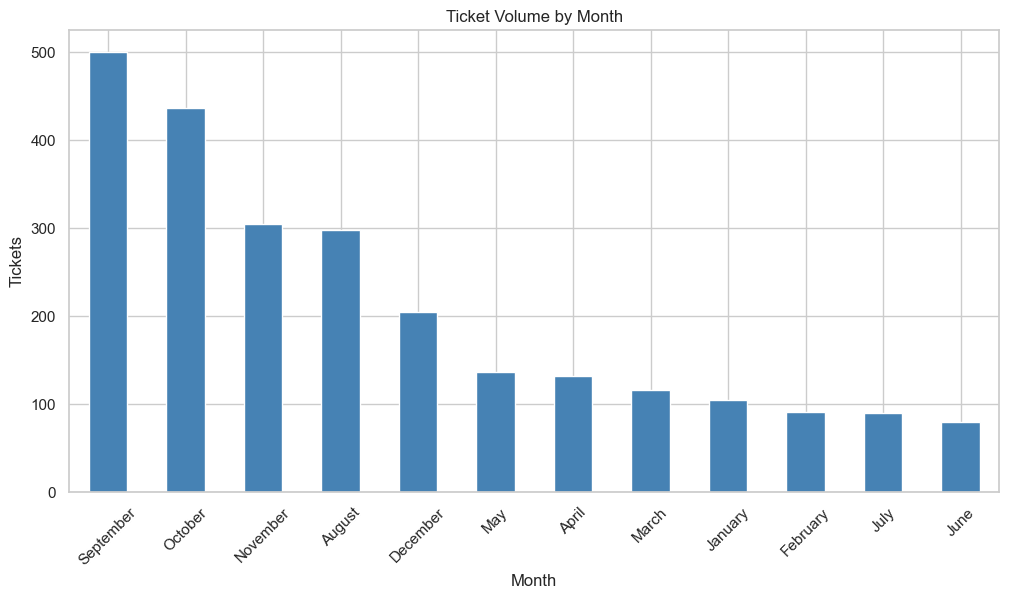

In [56]:
df['Month'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Ticket Volume by Month')
plt.xlabel('Month')
plt.ylabel('Tickets')
plt.xticks(rotation=45)
plt.show()

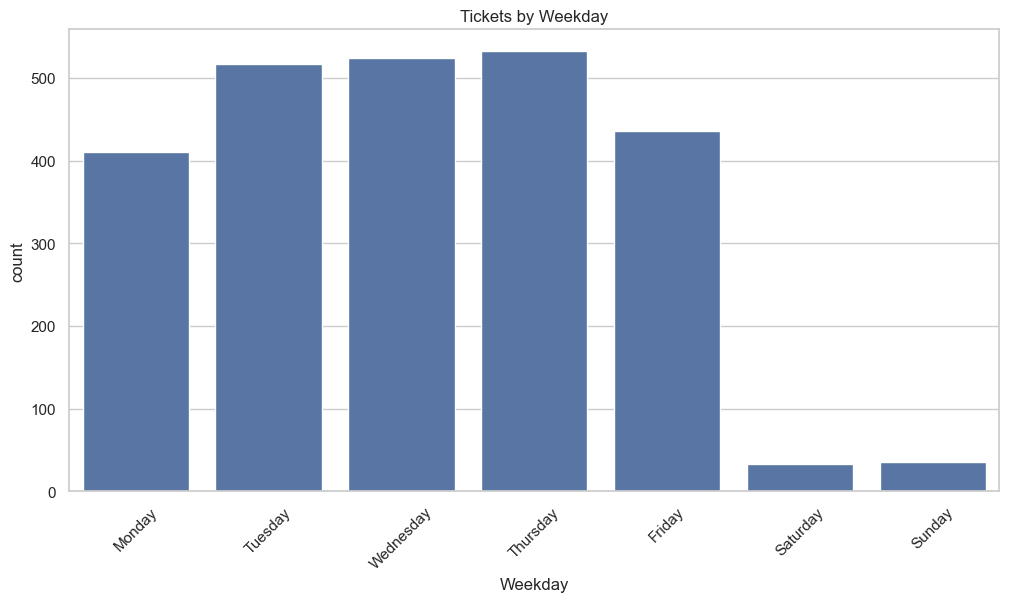

In [57]:
sns.countplot(data=df, x='Weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Tickets by Weekday')
plt.xticks(rotation=45)
plt.show()

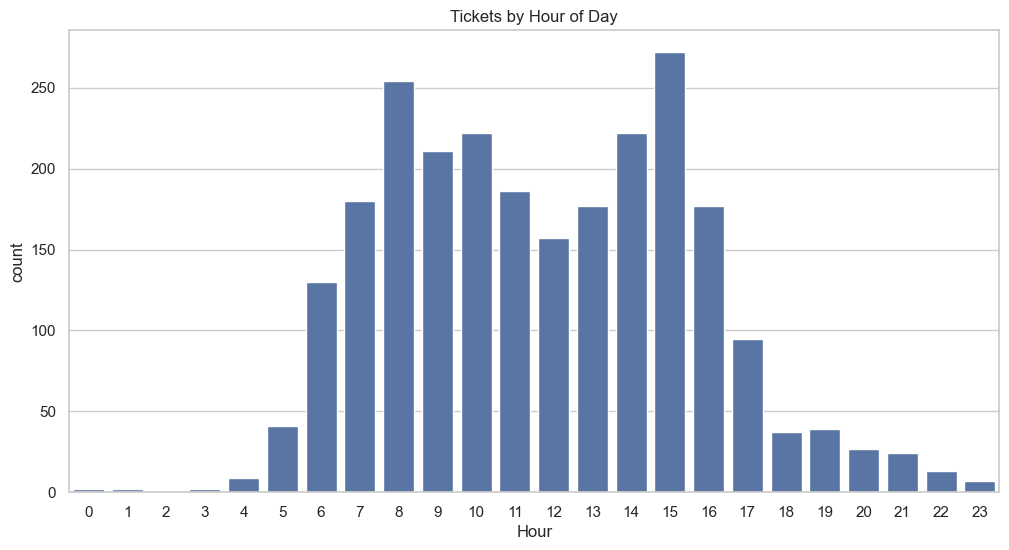

In [58]:
sns.countplot(data=df, x='Hour')
plt.title('Tickets by Hour of Day')
plt.show()

## 4.2 Region & Location Analysis

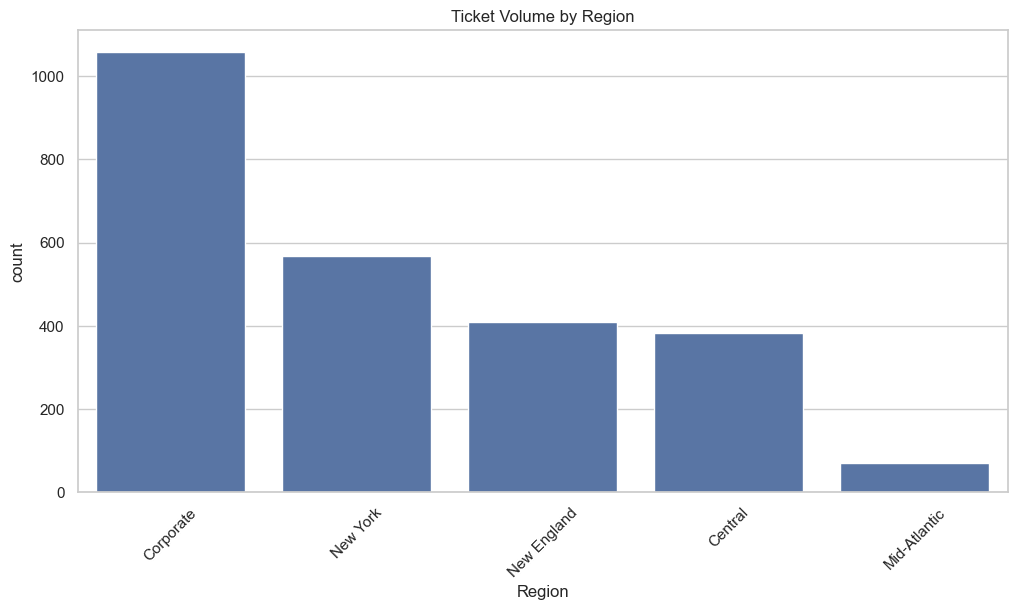

In [59]:
sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Ticket Volume by Region')
plt.xticks(rotation=45)
plt.show()

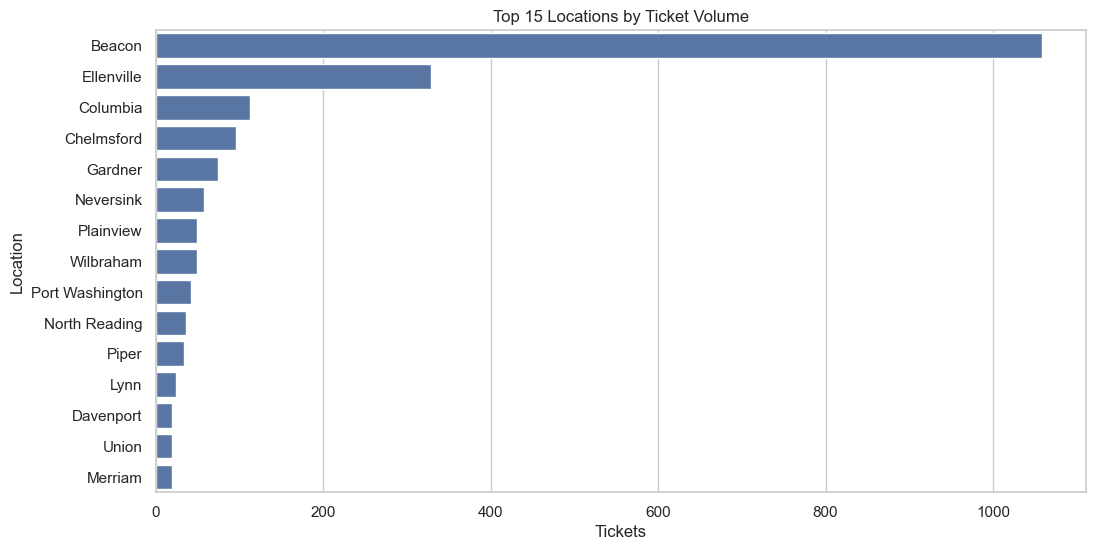

In [60]:
top_locations = df['Location'].value_counts().head(15)

sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 15 Locations by Ticket Volume')
plt.xlabel('Tickets')
plt.ylabel('Location')
plt.show()

## 4.3 Category & Subcategory Analysis

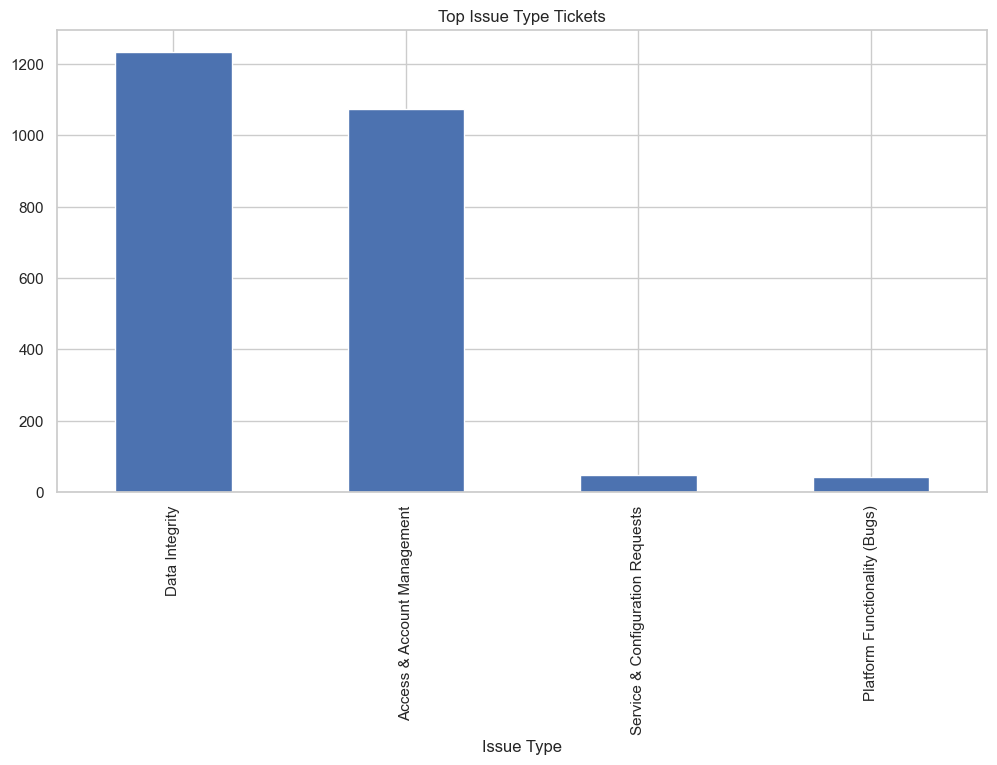

In [61]:
df['Issue Type'].value_counts().head(10).plot(kind='bar')
plt.title('Top Issue Type Tickets')
plt.show()

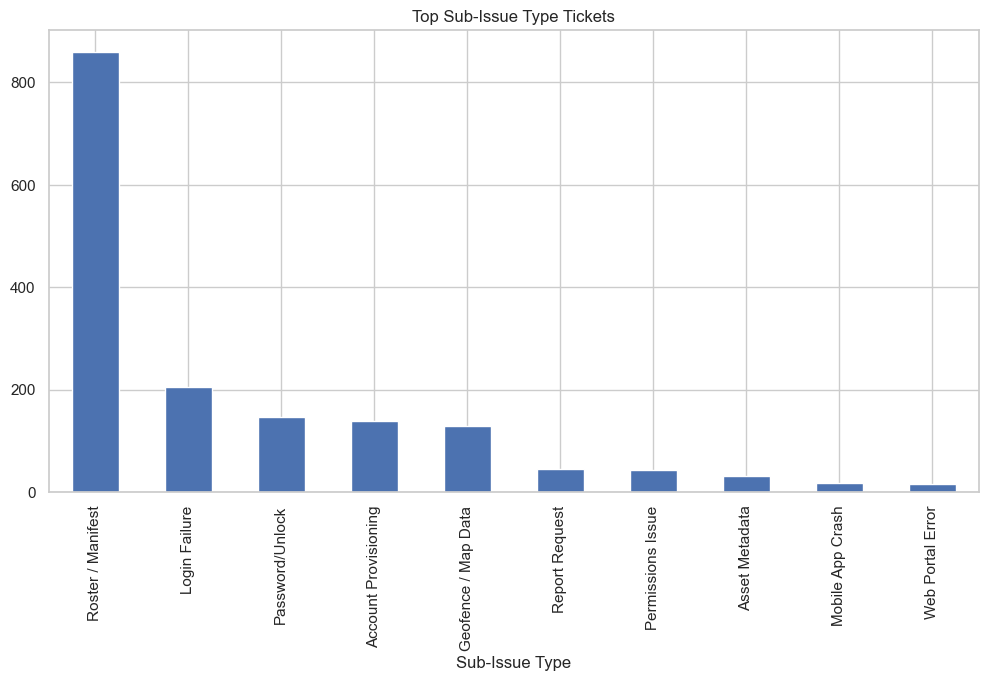

In [62]:
df['Sub-Issue Type'].value_counts().head(10).plot(kind='bar')
plt.title('Top Sub-Issue Type Tickets')
plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_3704\407342964.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(issue_type_counts.index, rotation=45)


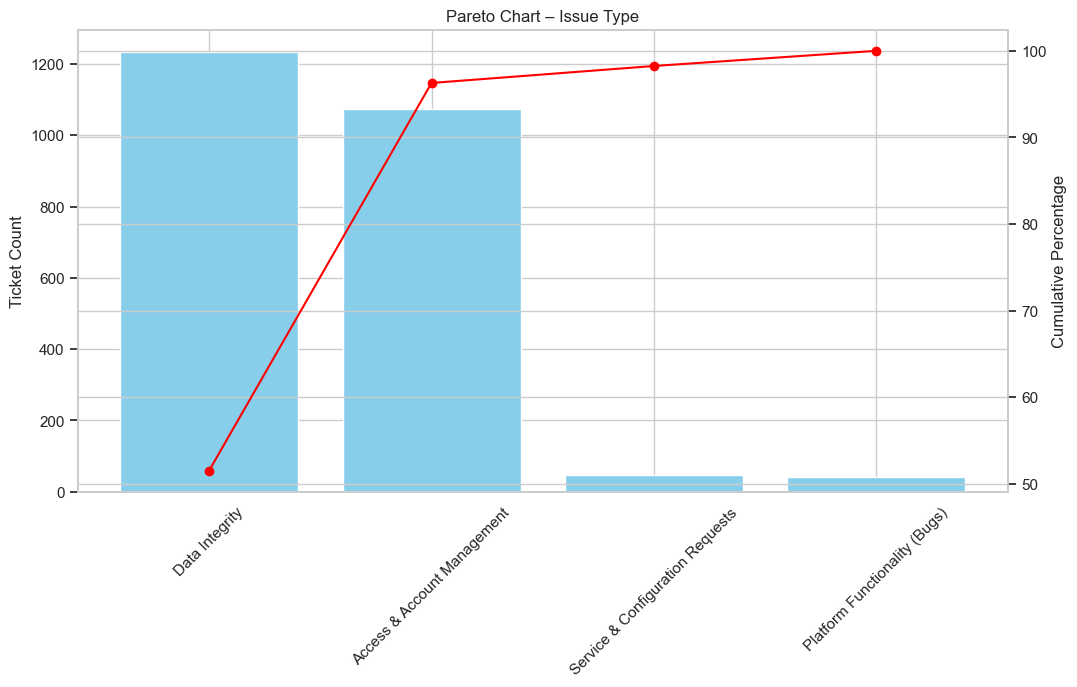

In [63]:
issue_type_counts = df['Issue Type'].value_counts()
cum_percentage = issue_type_counts.cumsum() / issue_type_counts.sum() * 100

fig, ax1 = plt.subplots()

ax1.bar(issue_type_counts.index, issue_type_counts.values, color='skyblue')
ax1.set_ylabel('Ticket Count')
ax1.set_xticklabels(issue_type_counts.index, rotation=45)

ax2 = ax1.twinx()
ax2.plot(issue_type_counts.index, cum_percentage, color='red', marker='o')
ax2.set_ylabel('Cumulative Percentage')

plt.title('Pareto Chart – Issue Type')
plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_3704\4217676831.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(subissue_type_counts.index, rotation=45)


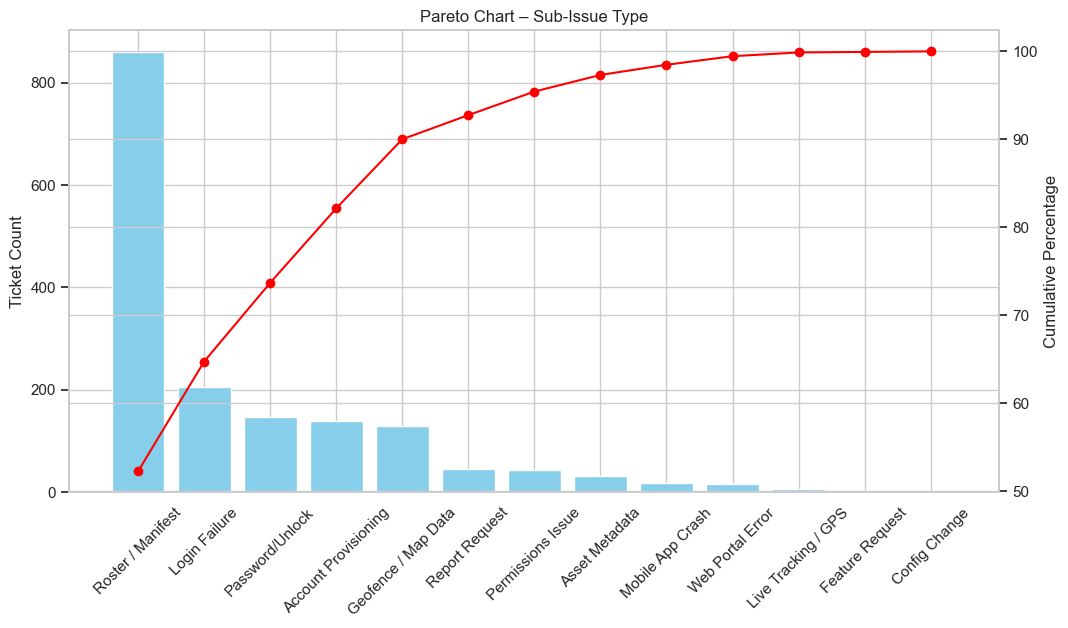

In [64]:
subissue_type_counts = df['Sub-Issue Type'].value_counts()
cum_percentage = subissue_type_counts.cumsum() / subissue_type_counts.sum() * 100

fig, ax1 = plt.subplots()

ax1.bar(subissue_type_counts.index, subissue_type_counts.values, color='skyblue')
ax1.set_ylabel('Ticket Count')
ax1.set_xticklabels(subissue_type_counts.index, rotation=45)

ax2 = ax1.twinx()
ax2.plot(subissue_type_counts.index, cum_percentage, color='red', marker='o')
ax2.set_ylabel('Cumulative Percentage')

plt.title('Pareto Chart – Sub-Issue Type')
plt.show()

## 4.4 Resolution Time Analysis

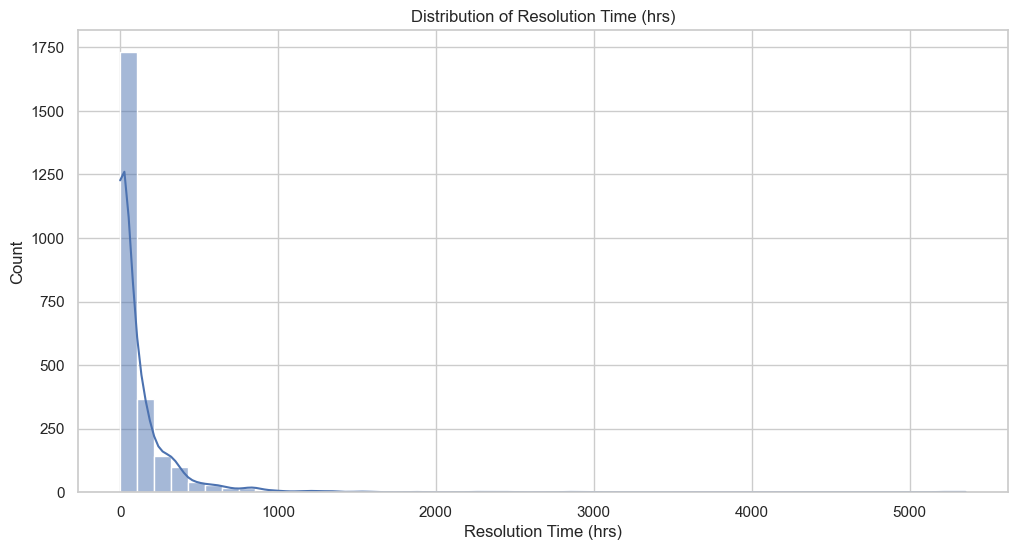

In [65]:
sns.histplot(df['Resolution Time (hrs)'], bins=50, kde=True)
plt.title('Distribution of Resolution Time (hrs)')
plt.show()

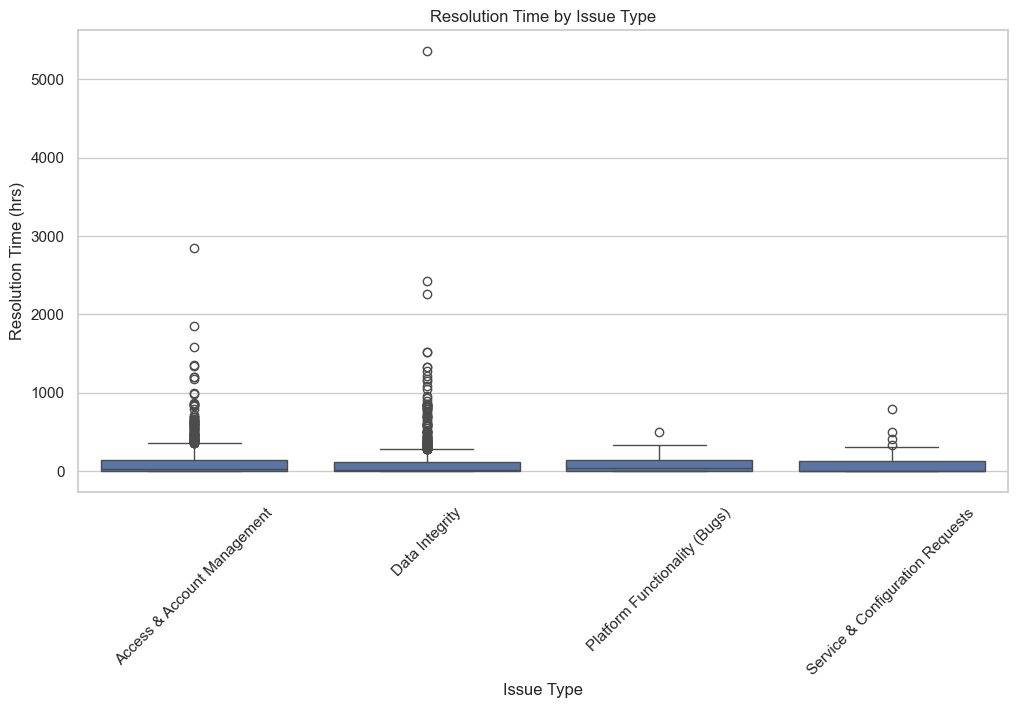

In [66]:
sns.boxplot(data=df, x='Issue Type', y='Resolution Time (hrs)')
plt.title('Resolution Time by Issue Type')
plt.xticks(rotation=45)
plt.show()

# 5. Insights & Recommendations

## Key Findings
- (Fill after running the analysis)
- Example: Region X generates the highest ticket volume.
- Example: Password resets represent 35% of all tickets.

## Recommendations
- Automate repetitive tasks (password resets, account unlocks).
- Provide targeted training for high-issue locations.
- Improve staffing coverage for peak hours.
- Review processes for categories with long resolution times.